# Ultimate Technologies Take-Home Challenge

## Part 1: EDA with Time Series Data

### Summary of results

I aggregated the login counts by 15 minute intervals, and created a line plot of the counts. The count data appears to be very noisy. Intervals with large numbers of trips are often followed by intervals with 0 trips. This may be from real variation, but it could also indicate missing or inaccurate data. There are some very high outliers in the data, which can be seen in a boxplot of aggregated counts. While these may indicate times of high demand, they may also indicate a problem with the data.

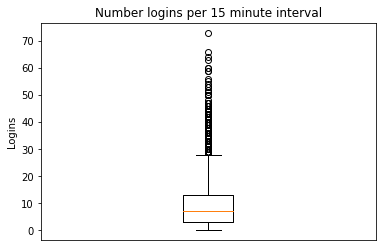

To find the overall trend in the data, I plotted logins together with a seven-day moving average. The moving average shows a slight trend upward, and there is an especially busy week in late March, but the magnitude of the trend seems to be small compared to the fluctuations in a given day.

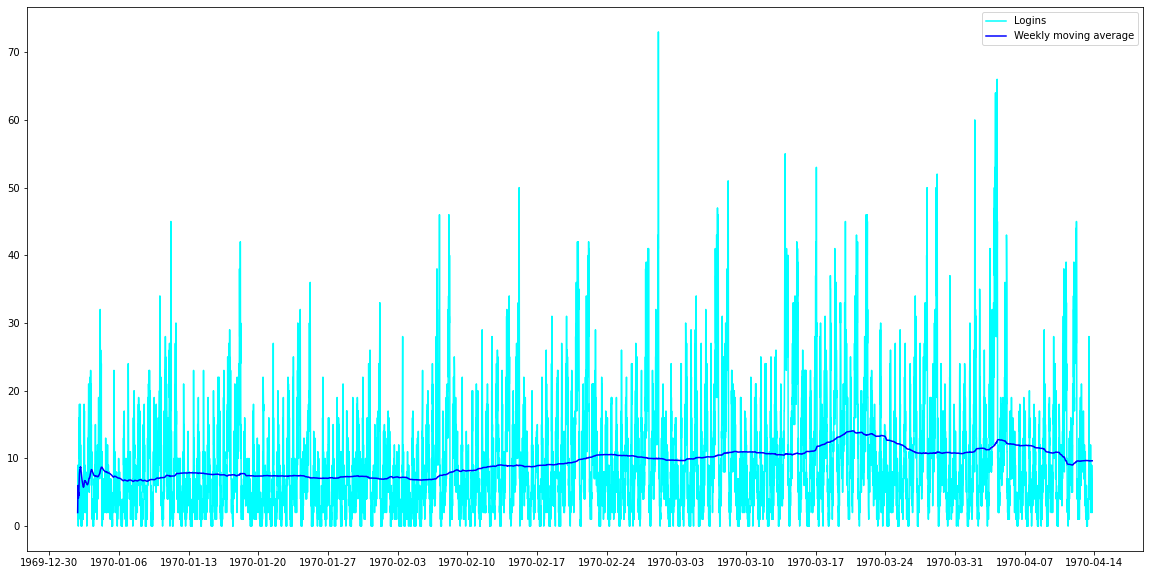

I then plotted a one-day moving average. Here, it seems there is a weekly cycle. Demand drops early in the workweek, and peaks later in the week. This pattern is fairly consistent across the time period studied.

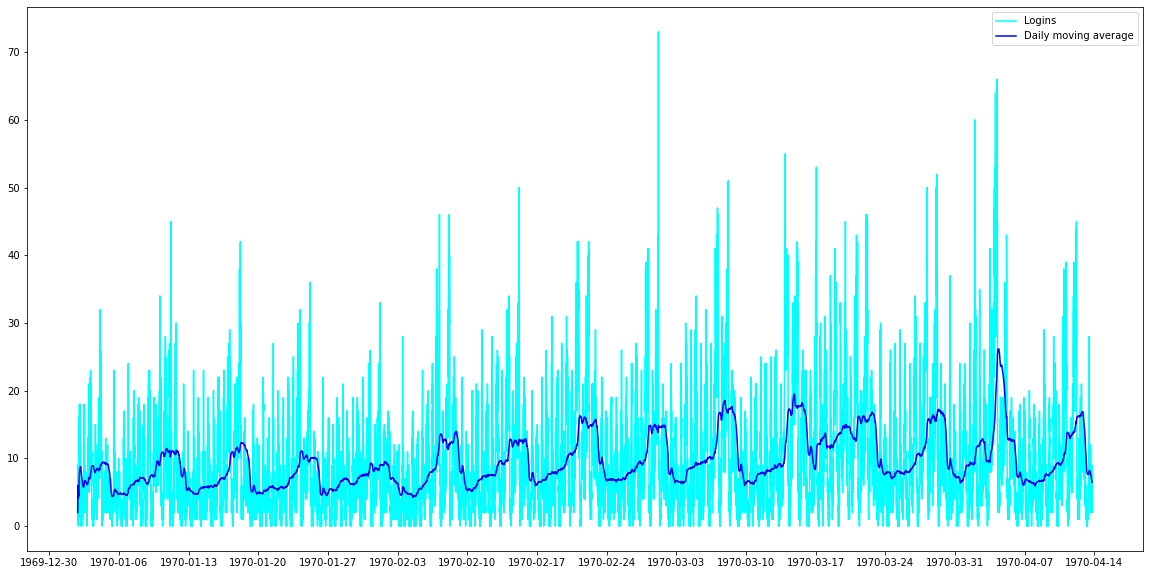

The last plot showed a repeating weekly pattern, and the longer-term trends in the data are relatively weak. So to illustrate daily cycles in demand, I grouped the data by weekday, and plotted the mean number of logins for each 15-minute interval and each day of the week. I plotted weekdays and weekends separately, since they show different patterns.

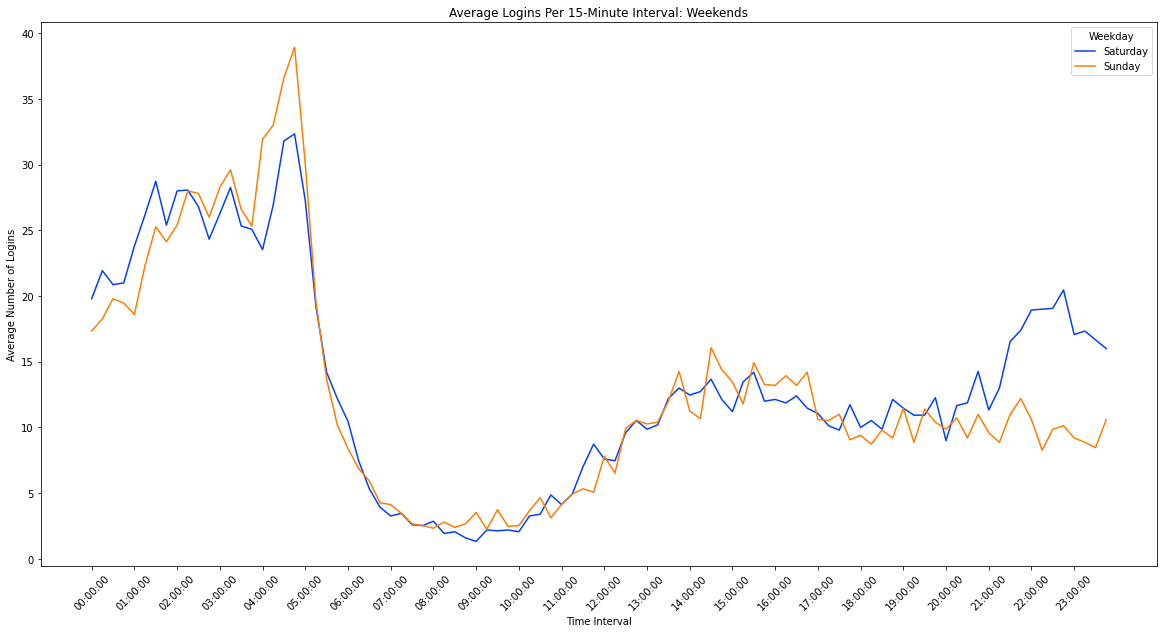

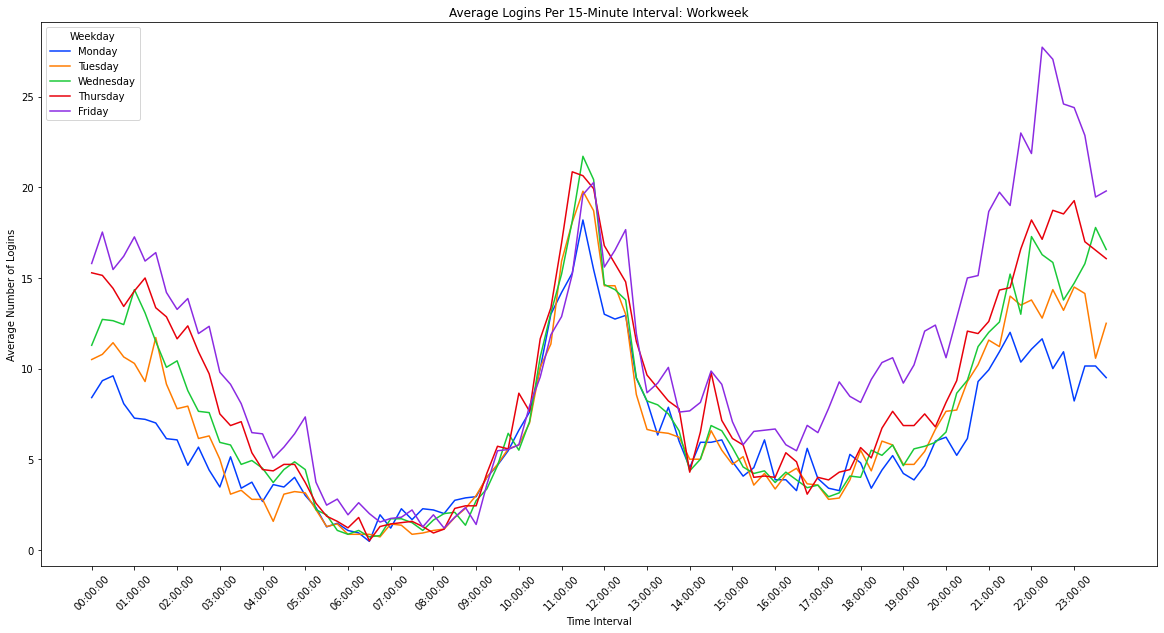

From the plots, we see there are distinct patterns on weekdays vs. weekends. On weekdays, demand peeks around midday and again around 10:00-11:00pm. The midday peak appears to be consistent, but the late-night peak becomes higher as the week goes on. Demand is lower in the early morning, around 6:00am. On weekends, demand is high from about 1:00am-7:00am, drops to a low around 8:00-9:00am, and then rises to a moderate level in the afternoon. The business times overall are weekends around 1:00am.

### Code for EDA

In [2]:
## Import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Read in and inspect the data.

logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [64]:
# Set timestamp as the index for the data frame of logins

logins['idx'] = logins.index
logins = logins.set_index('login_time')
logins.head()

,idx
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4


In [65]:
# Aggregrate the trips by 15-minute intervals.

counted = logins.resample('15T').count()
counted.head()
counted.columns = ['count']
counted.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


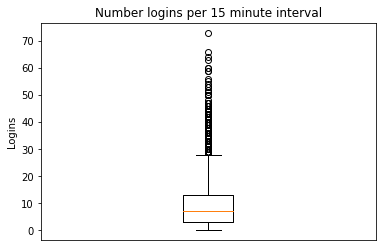

In [66]:
# Examine the distribution of logins by 15 minute interval. It appears the distribution
# is quite skewed, with some extremely high outliers.

plt.boxplot(counted['count'])
plt.ylabel('Logins')
plt.xticks([])
plt.title('Number logins per 15 minute interval')
plt.show()

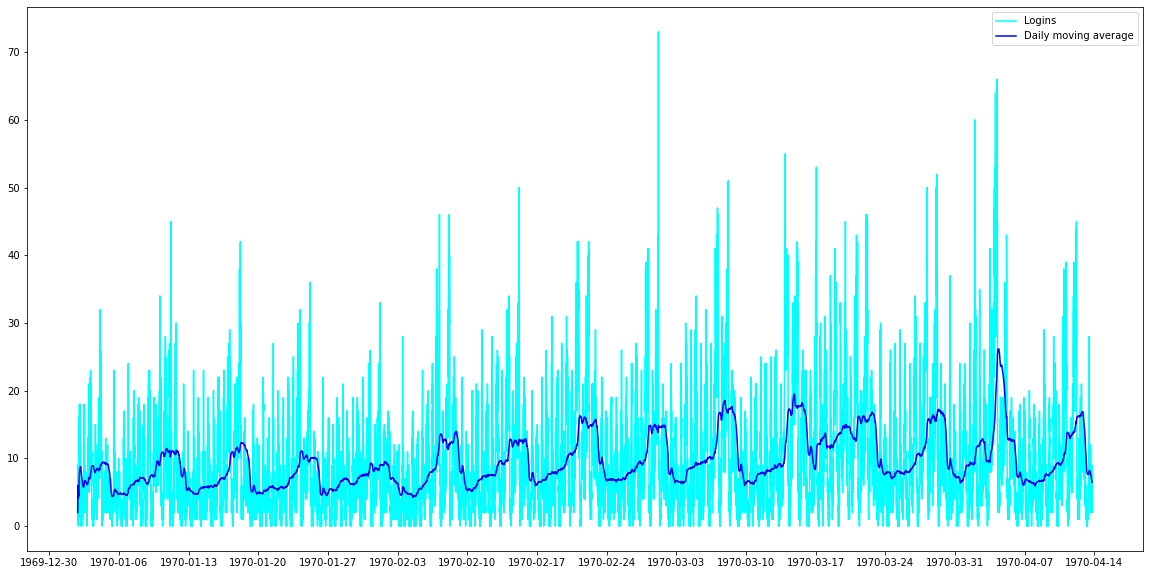

In [67]:
by_week = counted.rolling(window = '7D').mean()
by_day = counted.rolling(window = '1D').mean()

import matplotlib.dates as mdates

## Plot logins by 15-minute interval, together with a daily moving average. 
## It looks like there is a weekly cycle: logins peak toward the end of each week,
## and then drop off toward the beginning of the week.

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(counted, color='cyan', label='Logins')
ax.plot(by_day, color='blue', label='Daily moving average')
ax.legend()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.show()

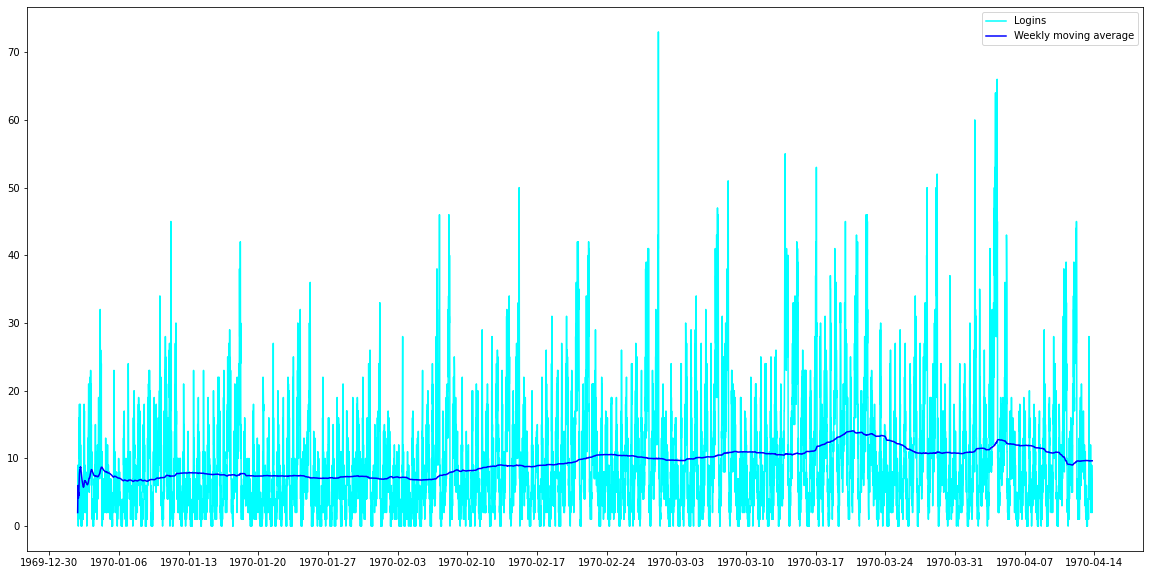

In [68]:
# Plot logins for each 15 minute interval, together with a weekly moving average.
# It seems that there is some week-to-week variation, with a slight upward trend.
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(counted, color='cyan', label='Logins')
ax.plot(by_week, color='blue', label='Weekly moving average')
ax.legend()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.show()

In [69]:
counted.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
counted['Weekday'] = counted.index.map(lambda x: x.weekday())
counted['Minute'] = counted.index.map(lambda x: x.strftime("%H:%M:%S"))
counted.head()

,count,Weekday,Minute
login_time,,,
1970-01-01 20:00:00,2,3,20:00:00
1970-01-01 20:15:00,6,3,20:15:00
1970-01-01 20:30:00,9,3,20:30:00
1970-01-01 20:45:00,7,3,20:45:00
1970-01-01 21:00:00,1,3,21:00:00


In [9]:
by_weekday_grouped = counted.groupby(['Weekday', 'Minute']).agg('mean')
by_weekday_grouped

count
Weekday Minute             
0       00:00:00   8.400000
        00:15:00   9.333333
        00:30:00   9.600000
        00:45:00   8.066667
        01:00:00   7.266667
...                     ...
6       22:45:00  10.133333
        23:00:00   9.200000
        23:15:00   8.866667
        23:30:00   8.466667
        23:45:00  10.600000

[672 rows x 1 columns]

In [10]:
by_weekday_grouped
by_weekday = by_weekday_grouped.reset_index()
by_weekday['Weekday'] = by_weekday['Weekday'].replace({0:'Monday', 
                            1:'Tuesday', 
                            2:'Wednesday', 
                            3:'Thursday',
                            4:'Friday',
                            5:'Saturday',
                            6:'Sunday'})
by_weekday.head()
by_weekday = by_weekday.rename({'count':'Average Logins'}, axis=1)

In [11]:
# Create list with a timestamp for beginning of ever hour to index plot.
hours = range(0, 96, 4) 
hours = by_weekday['Minute'][hours].to_list()
hours[:5]

['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00']

In [12]:
weekend = by_weekday[by_weekday['Weekday'].isin(['Saturday', 'Sunday'])]
weekend.head()

,Weekday,Minute,Average Logins
480,Saturday,00:00:00,19.800000
481,Saturday,00:15:00,21.933333
482,Saturday,00:30:00,20.866667
483,Saturday,00:45:00,21.000000
484,Saturday,01:00:00,23.800000


In [13]:
workweek = by_weekday[~(by_weekday['Weekday'].isin(['Saturday', 'Sunday']))]
workweek.head()

,Weekday,Minute,Average Logins
0,Monday,00:00:00,8.400000
1,Monday,00:15:00,9.333333
2,Monday,00:30:00,9.600000
3,Monday,00:45:00,8.066667
4,Monday,01:00:00,7.266667


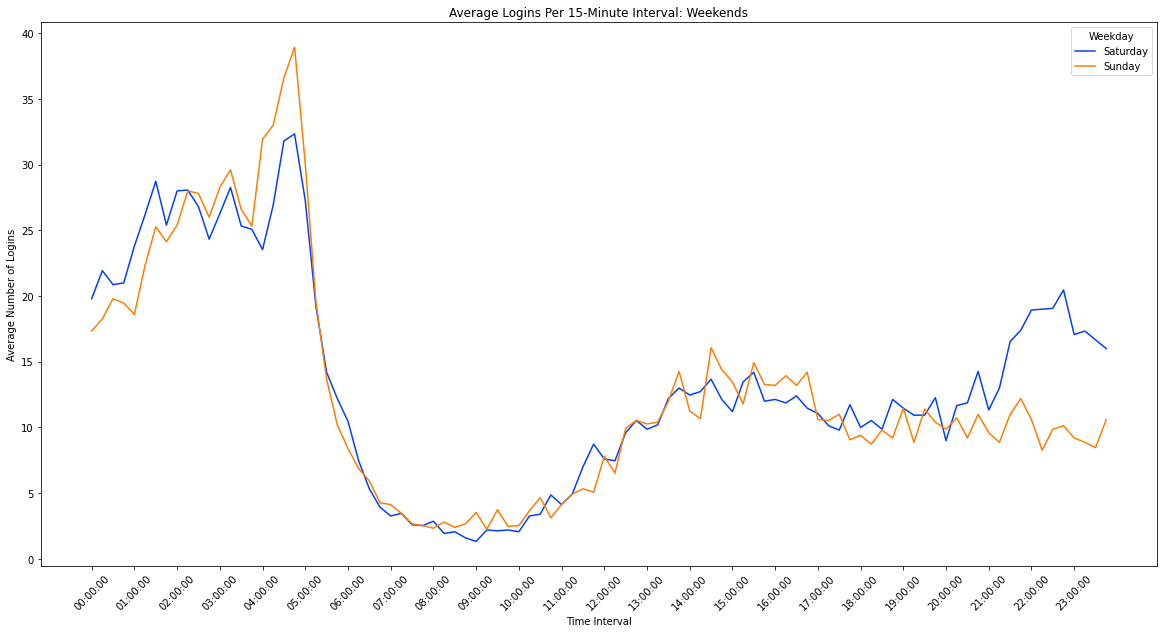

In [14]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = weekend, x = 'Minute', 
             y = 'Average Logins', 
             hue='Weekday', 
             palette='bright')
plt.xlabel('Time Interval')
plt.ylabel('Average Number of Logins')
plt.xticks(hours, rotation = 45)
plt.title('Average Logins Per 15-Minute Interval: Weekends')
plt.show()

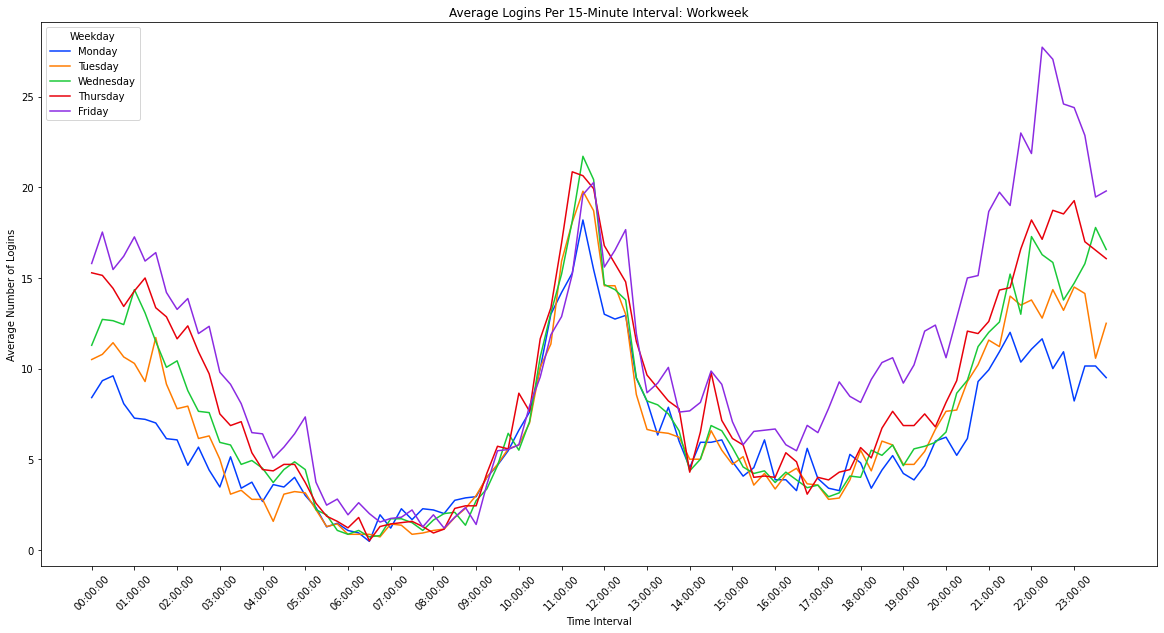

In [15]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = workweek, x = 'Minute', 
             y = 'Average Logins', 
             hue='Weekday', 
             palette='bright')
plt.xlabel('Time Interval')
plt.ylabel('Average Number of Logins')
plt.xticks(hours, rotation = 45)
plt.title('Average Logins Per 15-Minute Interval: Workweek')
plt.show()

## Part 2: Experiment and Metrics Design

**1:** What would you choose as the key measure of success on this experiment in encouraging driver partners to be available in both cities, and why would you choose this metric?

**Answer:** The goal immediate goal of this experiment is to encourage more drivers to be available to both cities. However, the ultimate goal is to increase profits for Ultimate Technologies, by ensuring that more drivers are available. Simply measuring whether more drivers are willing to serve both cities does not tell us whether Ultimate should continue this program. Instead, I would like to measure the impact of the change on Ultimate's revenue stream.

For a driver serving both cities, the most logical choice is to serve each city during its peak hours (Metropolis during the day, Gotham at night). This means that during the workweek, there should be more drivers available during peak hours in both cities.
More available drivers, in turn, should make the Ultimate service more convient, which will increase customer satisfaction and lead to more buisness. Hence, if the experiment is successful, we should see an increase in weekday revenues, reflecting the increasing avilability of drivers during peak hours. (Weekend revenue will likely not be impacted, as drivers can earn plenty of money in their home cities on weekends.) Hence I will use revenue during the work week as my key measure of success.

**2:** Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

**a:** Describe how you would implement the experiment. 

I would examine weekday data from a 4-6 week period before the change, and a 4-6 week period starting after the change. To ensure that drivers have time to adjust their behavior, I would start my post-change data collection at least a couple of weeks after the change took place. I would compute revenue for each day, and check whether average daily revenue was higher after the change.

**b:** Describe what statistical test(s) will you conduct to verify the significance of the observation.

I would caluculate a confidence interval for the difference in mean weekday revenue before and after the reimbursement policy. This will allow me to check whether there is a statistically significant benefit to the change, and also estimate the magnitude of this benefit. Since the study involves a relatively small number of samples, which may not come from a normal distribution, I would use non-parametric methods to calculate a confidence interval, such as bootstrapping.

**c:** Describe how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Based on my confidence interval, I would provide a range of likely values for the mean change in revenue per weekday before and after the reimbursement policy. There are two major caveats for this. The first is that my data is limited, since I designed a relatively short experiment for the purpose of having results in a reasonable time. The second is that a change in weekday revenue may be the result of something other than the reimbursement policy. Checking for any changes in weekend revenue might help determine whether other factors were responsible for the change, but this is only a partial solution.

## Part 3: Predictive Modeling

### Summary of results

#### Cleaning and visualizing data

After loading and inspecting the data, I imputed missing values. For numerical columns, I imputed the median; for categorical columns, I imputed the most common value. At this stage, I created an indicator variable to record whether a user was retained. Overall, about 37.7% of users were retained in this data sets. I examined boxplots of the data to check for outliers, and trimmed the most extreme 2.5% of values for each numerical variable with outliers present. Finally, I used grouped boxplots an heatmap of correlations to check for potential predictors.

#### Modeling

I fit both random forest and logistic regression models to the data. Both of these are relatively simple and interpretable, and tend to give strong predictive performance for binary classification problems. Since my goal was actionable insights about factor that lead to retension, I prioritize having an interpretable model.

I separated data into training and test sets, and used cross-validation to tune hyperparameters for both algorithms. I found the random forest algorithm gave better predictive performance, with an accuracy of 76% on my test data. However, the feature importances for this model were not easy to interpret in the context of my earlier EDA. For example, average trip distance was identified as an important feature--but based on the plots from earlier, the relationship between these two quantities is not at all clear.

Logistic regression had somewhat lower predictive performance, but the coefficients are much easier to interpret. Since my goal was interpretability, I chose an optimized logistic regression model. My final model used balanced class weights, to compensate for the fact that a minority of customers are retained. The overall accuracy on the test set was 70%, with precision of 60% and recall of 68%. (Models without the class weighting has slightly higher accuracy overall, but much lower recall.) 

#### Insights

Based on the coefficients from the logistic regression model, the strongest relationship was living in King's Landing (coefficient 0.7), having an iPhone (coefficient 0.49), trips in the first 30 days (coefficient 0.41) and using Ultimate Black (coefficient 0.40). This may indicate that Ultimate should attempt to recruit more customers in King's Landing. If that market is already saturated, further study could be done to determine what features of King's Landing are causing the difference. Offering promotions to encourage use of Ultimate Black, or encourage more trips in the first 30 days, may boost retension. Given the disparity between iPhone and Android users may be worth examining whether the Ultimate app works better on iPhone than on Android devices.

### Code

#### Load and inspect the data

In [190]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


#### Basic Data Cleaning

In [191]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [192]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [193]:
start = pd.to_datetime('2014-06-01')
df['retained'] = df['last_trip_date'] >= start

In [194]:
print('Percent users retained: ', df.retained.sum()/df.shape[0])

Percent users retained:  0.37608


In [195]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


#### Impute missing values

In [196]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [197]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [198]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(strategy='median')
df[['avg_rating_of_driver', 
    'avg_rating_by_driver']] = imp_med.fit_transform(df[['avg_rating_of_driver', 
                                                         'avg_rating_by_driver']])
df.isna().any()

city                      False
trips_in_first_30_days    False
signup_date               False
avg_rating_of_driver      False
avg_surge                 False
last_trip_date            False
phone                      True
surge_pct                 False
ultimate_black_user       False
weekday_pct               False
avg_dist                  False
avg_rating_by_driver      False
retained                  False
dtype: bool

In [199]:
df = df.fillna(value='iPhone')

In [200]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

#### Detect and trim outliers

In [201]:
numeric = df.select_dtypes(['int64', 'float64'])
numeric.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.650038,1.074764,8.849536,60.926084,5.796827,4.779050
std,3.792684,0.575601,0.222336,19.958811,37.081503,5.707357,0.445974
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


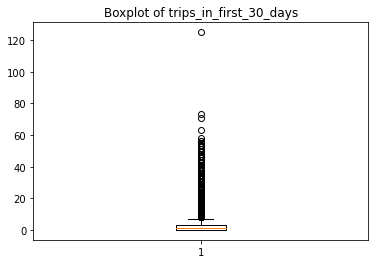

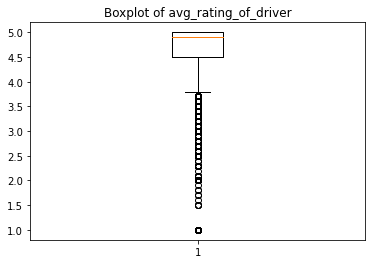

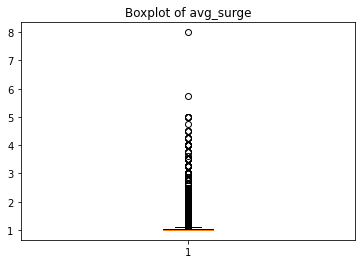

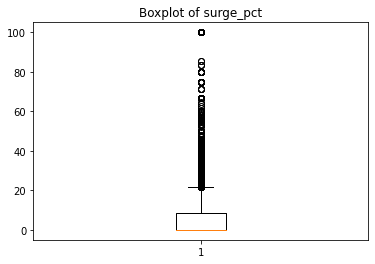

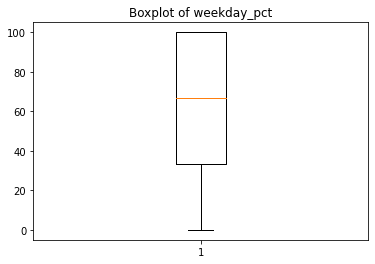

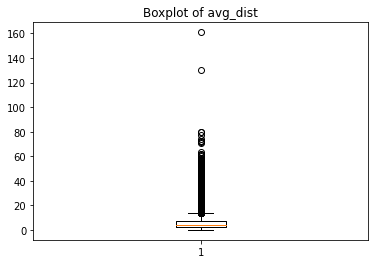

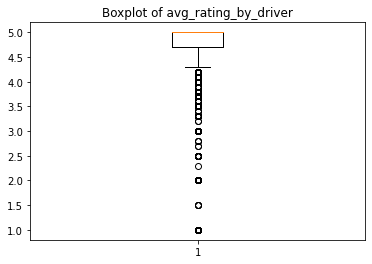

In [202]:
for var_name in numeric.columns:
    plt.boxplot(df[var_name])
    plt.title('Boxplot of ' + var_name)
    plt.show()

It looks like all numeric variables have some outliers. Since we would like to use logistic regression, we will want to cap outliers. The interquartile range method does not seem to make sense for some of these columns, since the distributions are so dramatically skewed. Instead, let's call the top 2.5% of values outliers for all columns except the ratings columns. For ratings, let's call the bottom 2.5% outliers.

In [203]:
def find_outliers(col_name, direction='high'):
    if direction == 'high':
        perc = np.percentile(df[col_name], 97.5)
        return(perc, df[col_name] >= perc)
    else:
        perc = np.percentile(df[col_name], 2.5)
        return(perc, df[col_name] <= perc)

In [204]:
for col in ['trips_in_first_30_days', 'avg_dist', 'avg_surge', 'surge_pct']:
    outlier_info = find_outliers(col)
    df.loc[outlier_info[1], col] = outlier_info[0]

In [205]:
for col in ['avg_rating_of_driver', 'avg_rating_by_driver']:
    outlier_info = find_outliers(col, 'low')
    df.loc[outlier_info[1], col] = outlier_info[0]

#### Exploratory Data Analysis

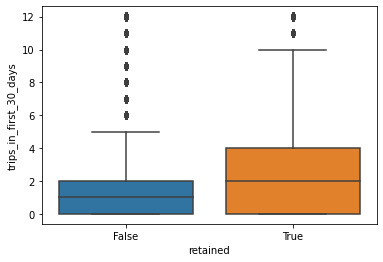

In [206]:
sns.boxplot(data = df, x = 'retained', y = 'trips_in_first_30_days')
plt.show()

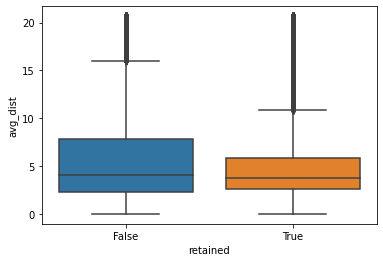

In [207]:
sns.boxplot(data = df, x = 'retained', y = 'avg_dist')
plt.show()

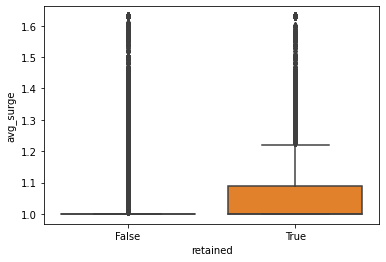

In [208]:
sns.boxplot(data = df, x= 'retained', y = 'avg_surge')
plt.show()

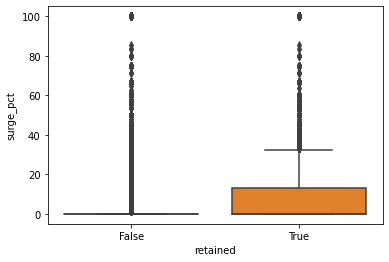

In [209]:
sns.boxplot(data = df, x= 'retained', y = 'surge_pct')
plt.show()

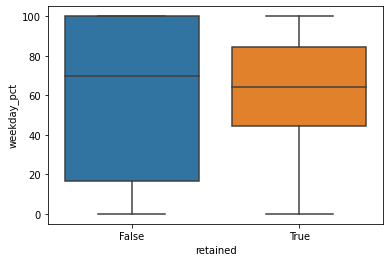

In [210]:
sns.boxplot(data = df, x= 'retained', y = 'weekday_pct')
plt.show()

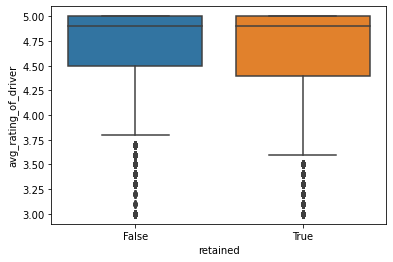

In [211]:
sns.boxplot(data = df, x= 'retained', y = 'avg_rating_of_driver')
plt.show()

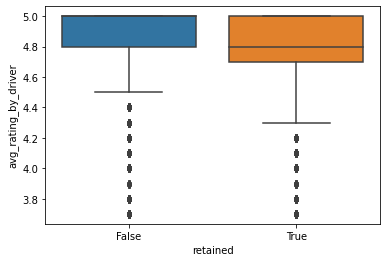

In [212]:
sns.boxplot(data = df, x= 'retained', y = 'avg_rating_by_driver')
plt.show()

In [213]:
df.groupby('city')['retained'].mean()

city
Astapor           0.255715
King's Landing    0.628134
Winterfell        0.351945
Name: retained, dtype: float64

In [214]:
df.groupby('phone')['retained'].mean()

phone
Android    0.209426
iPhone     0.447653
Name: retained, dtype: float64

In [215]:
df.groupby('ultimate_black_user')['retained'].mean()

ultimate_black_user
False    0.298818
True     0.503713
Name: retained, dtype: float64

#### Exploratory data analysis

In [216]:
numeric['retained'] = df['retained']
numeric.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,4,4.7,1.10,15.4,46.2,3.67,5.0,True
1,0,5.0,1.00,0.0,50.0,8.26,5.0,False
2,3,4.3,1.00,0.0,100.0,0.77,5.0,False
3,9,4.6,1.14,20.0,80.0,2.36,4.9,True
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False


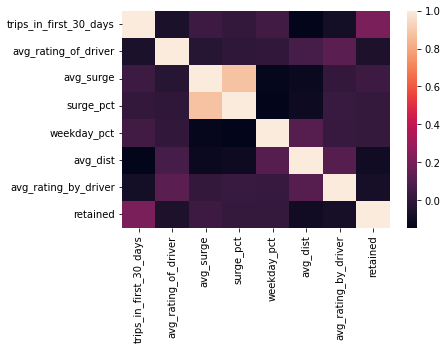

In [217]:
sns.heatmap(numeric.corr())
plt.show()

#### Preprocess data

In [218]:
# Dummy encode categorical variables

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_King's Landing,city_Winterfell,phone_iPhone
0,4.000,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,True,1,0,1
1,0.000,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,False,0,0,0
2,3.000,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,False,0,0,1
3,9.000,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,True,1,0,1
4,12.025,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,False,0,1,0


In [219]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
y = df_encoded.retained
X = df_encoded.drop(['retained', 'last_trip_date', 'signup_date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [220]:
from sklearn.preprocessing import StandardScaler
feat_names = X.columns
my_scale = StandardScaler()
X_train = my_scale.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = feat_names)
X_test = my_scale.transform(X_test)
X_test = pd.DataFrame(X_test, columns = feat_names)

#### Fit basic logistic regression and random forest models

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [222]:
# Out of the box performance for logistic regression

logistic = LogisticRegression()                                 
print('Cross-validated performance for logistic regression:')
cross_validate(logistic, X_train, y_train, cv = 3, scoring=['accuracy', 
                                                            'precision',
                                                            'recall'])

Cross-validated performance for logistic regression:


{'fit_time': array([0.07858562, 0.11970329, 0.08322668]),
 'score_time': array([0.02913523, 0.03038573, 0.03008795]),
 'test_accuracy': array([0.72709351, 0.71877946, 0.73049889]),
 'test_precision': array([0.68404813, 0.66778831, 0.69128141]),
 'test_recall': array([0.50651131, 0.49862951, 0.50902445])}

In [223]:
# Out of the box performance for random forest 

forest = RandomForestClassifier()
print('Cross-validated performance for random forest:')
cross_validate(forest, X_train, y_train, cv=3, scoring=['accuracy', 
                                                        'precision',
                                                        'recall'])

Cross-validated performance for random forest:


{'fit_time': array([2.71482348, 2.64270544, 2.63936186]),
 'score_time': array([0.32524157, 0.32289863, 0.32525659]),
 'test_accuracy': array([0.75940687, 0.7566641 , 0.75690039]),
 'test_precision': array([0.68531634, 0.68317067, 0.68463935]),
 'test_recall': array([0.66323966, 0.65555048, 0.65273018])}

#### Hyperparameter tuning

In [224]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [0.01, 0.1, 1.0],'class_weight': ['balanced', None]}]
lr = LogisticRegression()
search_lr = GridSearchCV(estimator = lr, param_grid=param_grid, 
                         cv=3, 
                         scoring=['accuracy', 
                                  'precision', 
                                  'recall'],
                         refit='accuracy',
                         )
search_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1.0],
                          'class_weight': ['balanced', None]}],
             refit='accuracy', scoring=['accuracy', 'precision', 'recall'])

In [230]:
results = pd.DataFrame(search_lr.cv_results_)
metrics = results[['param_C', 'param_class_weight', 'mean_test_accuracy', 
         'mean_test_precision',
         'mean_test_recall']]
metrics.sort_values('mean_test_accuracy', ascending=False)

,param_C,param_class_weight,mean_test_accuracy,mean_test_precision,mean_test_recall
5,1.0,None,0.725457,0.681039,0.504722
3,0.1,None,0.725257,0.680888,0.504036
1,0.01,None,0.724800,0.682221,0.499011
2,0.1,balanced,0.704572,0.592762,0.679257
4,1.0,balanced,0.704400,0.592513,0.679333
0,0.01,balanced,0.704114,0.592375,0.677734


In [226]:
my_lr = LogisticRegression(class_weight='balanced')
my_lr.fit(X_train, y_train)
coefficients = pd.DataFrame(my_lr.coef_[0], index=my_lr.feature_names_in_,
                           columns = ['coefficient'])
coefficients['abs'] = np.abs(coefficients['coefficient'])
coefficients.sort_values('abs', ascending=False)

,coefficient,abs
city_King's Landing,0.704618,0.704618
phone_iPhone,0.492120,0.492120
trips_in_first_30_days,0.410043,0.410043
ultimate_black_user,0.402569,0.402569
city_Winterfell,0.227953,0.227953
avg_surge,0.213879,0.213879
avg_dist,-0.172876,0.172876
avg_rating_by_driver,-0.165086,0.165086
surge_pct,-0.143896,0.143896
avg_rating_of_driver,-0.089705,0.089705


In [235]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = my_lr.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('Precision on test set: ', precision_score(y_test, y_pred))
print('Recall on test set: ', recall_score(y_test, y_pred))

Accuracy on test set:  0.7039333333333333
Precision on test set:  0.5955003878975951
Recall on test set:  0.676657263751763


In [227]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': [25, 50, None],
               'class_weight': ['balanced', None]}]
rf = RandomForestClassifier()
search_rf = GridSearchCV(estimator = rf, param_grid=param_grid, 
                         cv=3,
                         verbose = 2,
                         scoring=['accuracy', 
                                  'precision', 
                                  'recall'],
                         refit='accuracy',
                         )
search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ................class_weight=balanced, max_depth=25; total time=   3.1s
[CV] END ................class_weight=balanced, max_depth=25; total time=   3.0s
[CV] END ................class_weight=balanced, max_depth=25; total time=   3.0s
[CV] END ................class_weight=balanced, max_depth=50; total time=   3.0s
[CV] END ................class_weight=balanced, max_depth=50; total time=   3.0s
[CV] END ................class_weight=balanced, max_depth=50; total time=   3.0s
[CV] END ..............class_weight=balanced, max_depth=None; total time=   3.0s
[CV] END ..............class_weight=balanced, max_depth=None; total time=   3.0s
[CV] END ..............class_weight=balanced, max_depth=None; total time=   3.0s
[CV] END ....................class_weight=None, max_depth=25; total time=   3.0s
[CV] END ....................class_weight=None, max_depth=25; total time=   3.0s
[CV] END ....................class_weight=None, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': ['balanced', None],
                          'max_depth': [25, 50, None]}],
             refit='accuracy', scoring=['accuracy', 'precision', 'recall'],
             verbose=2)

In [228]:
results = pd.DataFrame(search_rf.cv_results_)
metrics = results[['param_max_depth', 'param_class_weight', 'mean_test_accuracy', 
         'mean_test_precision',
         'mean_test_recall']]
metrics.sort_values('mean_test_accuracy', ascending=False)

,param_max_depth,param_class_weight,mean_test_accuracy,mean_test_precision,mean_test_recall
2,None,balanced,0.757457,0.686534,0.650701
3,25,None,0.757400,0.684625,0.655269
0,25,balanced,0.757000,0.684063,0.654736
4,50,None,0.756829,0.683558,0.655270
5,None,None,0.756571,0.683401,0.654356
1,50,balanced,0.755229,0.683319,0.647883


In [252]:
my_rf = RandomForestClassifier()
my_rf.fit(X_train, y_train)
y_pred = my_rf.predict(X_test)
print('Accuracy on test set: ', accuracy_score(y_test, y_pred))
print('Precision on test set: ', precision_score(y_test, y_pred))
print('Recall on test set: ', recall_score(y_test, y_pred))

Accuracy on test set:  0.7571333333333333
Precision on test set:  0.6875577740802367
Recall on test set:  0.6556770098730607


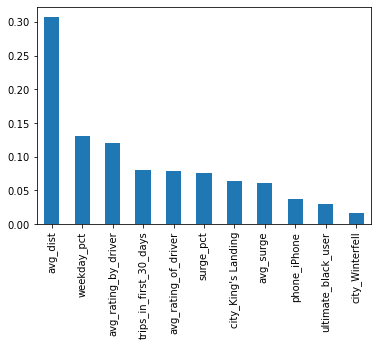

In [229]:
importances = search_rf.best_estimator_.feature_importances_
imp_series = pd.Series(importances, index = feat_names)
imp_series = imp_series.sort_values(ascending=False)
imp_series.plot.bar()
plt.show()